In [2]:
!pip install scikit-plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join

import glob
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
GDRIVE_MOUNT = '/content/drive'
GDRIVE_FOLDER = "MyDrive/DataScientest/DS Project Datas"
FOLDER_MODELS = join(GDRIVE_MOUNT, GDRIVE_FOLDER, "Modeles")

drive.mount(GDRIVE_MOUNT) 

Mounted at /content/drive


# Tableau de synthèse des metrics calculés sur les modèles évalués




In [4]:
metrics = {}
for d in os.listdir(FOLDER_MODELS):
  if os.path.isdir(join(FOLDER_MODELS,d)):
    try:
      uri_history = glob.glob(join(FOLDER_MODELS,d,"*-history.csv"))[0]
      history = pd.read_csv(uri_history)
      uri_metrics = glob.glob(join(FOLDER_MODELS,d,"*-metrics.json"))[0]
      metrics_tmp = json.load(open(uri_metrics))
      metrics_tmp.update({"n_epochs":history.shape[0]})
      metrics.update({d:metrics_tmp})
    except:
      pass
                   
df_metrics = pd.DataFrame.from_dict(metrics, orient="index").reset_index()
df_metrics[["Modèle","Retrain","Taille","NbClasses","Augmentation"]] = df_metrics["index"].str.split("-",expand=True)
df_metrics.set_index("index", inplace=True)
df_metrics.to_csv(join(FOLDER_MODELS, "metrics.csv"), sep=";", decimal=",")
df_metrics


,acc,f1,kappa,acc_binary,f1_binary,k_binary,n_epochs,Modèle,Retrain,Taille,NbClasses,Augmentation
index,,,,,,,,,,,,
EfficientNetB7v1-transfert-full-4-A2,0.691789,0.683738,0.754296,0.815523,0.814221,0.581243,35,EfficientNetB7v1,transfert,full,4,A2
EfficientNetB7v1-transfert-full-4-A3,0.689539,0.691325,0.780063,0.821147,0.816295,0.581054,33,EfficientNetB7v1,transfert,full,4,A3
EfficientNetB7v1-transfert-full-4-A0,0.686164,0.693048,0.786903,0.827897,0.826269,0.607691,17,EfficientNetB7v1,transfert,full,4,A0
EfficientNetB7v1-transfert-small-4-A3,0.678290,0.676014,0.776919,0.802025,0.801173,0.552845,24,EfficientNetB7v1,transfert,small,4,A3
EfficientNetB7v1-transfert-small-4-A0,0.698538,0.694084,0.813534,0.817773,0.819861,0.602305,19,EfficientNetB7v1,transfert,small,4,A0
EfficientNetB7v1-transfert-small-4-A2,0.645669,0.631107,0.708423,0.772778,0.773676,0.495185,22,EfficientNetB7v1,transfert,small,4,A2
EfficientNetB7v1-transfert-small-4-A1,0.669291,0.667208,0.745548,0.806524,0.802319,0.550292,29,EfficientNetB7v1,transfert,small,4,A1
ResNet50V2-transfert-small-4-A2,0.678290,0.681384,0.758246,0.799775,0.797979,0.543971,26,ResNet50V2,transfert,small,4,A2
ResNet50V2-retrain-small-4-A2,0.818898,0.819730,0.901887,0.898763,0.897952,0.769810,62,ResNet50V2,retrain,small,4,A2


# Détail de l'entrainement et des performances pour chaque modèle

In [29]:
def plot_history(history, classes = 4):

  fig,ax1 = plt.subplots()
  epochs = history.index

  try:
    ax1.plot(epochs, history['mae'], 'r', label='Training mae')
    ax1.plot(epochs, history['val_mae'], 'b', label='Validation mae')
  except:
    pass
  try:
    ax1.plot(epochs, history['accuracy'], 'r', label='Training accuracy')
    ax1.plot(epochs, history['val_accuracy'], 'b', label='Validation accuracy')
  except:
    pass

  ax2 = ax1.twinx()
  ax2.plot(epochs, history["lr"],"orange",label='Learning rate')
  ax2.set_yscale("log")

  h1, l1 = ax1.get_legend_handles_labels()
  h2, l2 = ax2.get_legend_handles_labels()
  ax1.legend(h1+h2, l1+l2, loc=8)

  plt.title("Courbe d'entrainement")
  plt.show()

In [36]:
def print_metrics(predictions):
  from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, f1_score
  from scikitplot.metrics import plot_confusion_matrix

  y_true = predictions.y_true
  y_pred = predictions.y_pred
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
  plot_confusion_matrix(y_true, y_pred, title="Matrice de confusion (4 classes)",ax=ax1)
  
  y_true_binary = np.array(y_true) >= 1
  y_pred_binary = np.array(y_pred) >= 1

  plot_confusion_matrix(y_true_binary, y_pred_binary, title="Matrice de confusion (2 classes)",ax=ax2)
  plt.show()
  
  print(classification_report(y_true, y_pred))

EfficientNetB7v1-transfert-full-4-A2


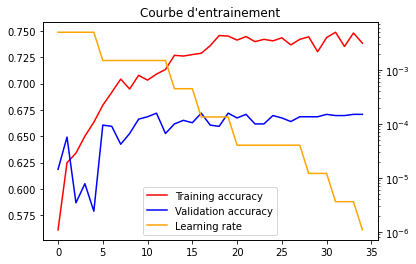

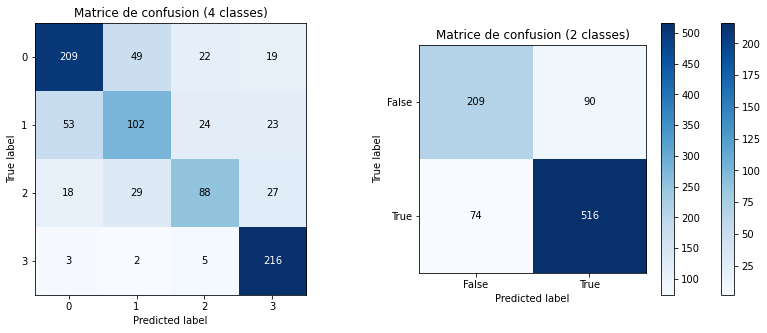

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       299
           1       0.56      0.50      0.53       202
           2       0.63      0.54      0.58       162
           3       0.76      0.96      0.85       226

    accuracy                           0.69       889
   macro avg       0.67      0.68      0.67       889
weighted avg       0.68      0.69      0.68       889



EfficientNetB7v1-transfert-full-4-A3


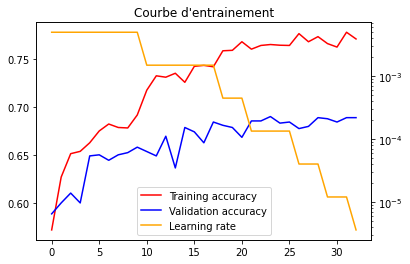

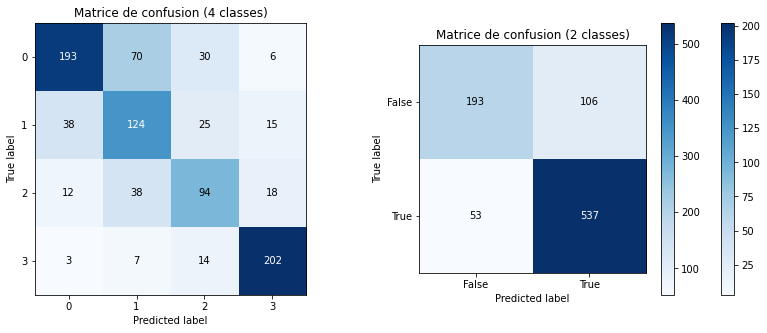

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       299
           1       0.52      0.61      0.56       202
           2       0.58      0.58      0.58       162
           3       0.84      0.89      0.87       226

    accuracy                           0.69       889
   macro avg       0.68      0.68      0.68       889
weighted avg       0.70      0.69      0.69       889



EfficientNetB7v1-transfert-full-4-A0


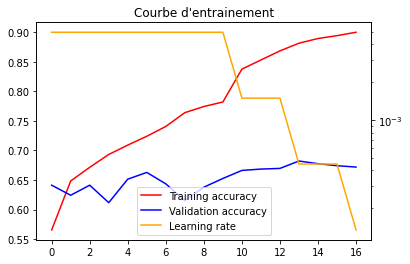

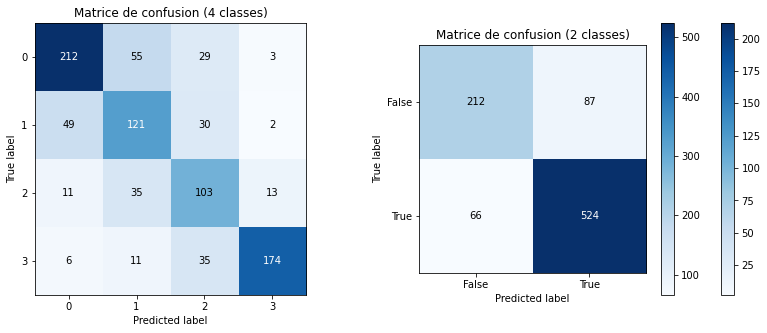

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       299
           1       0.55      0.60      0.57       202
           2       0.52      0.64      0.57       162
           3       0.91      0.77      0.83       226

    accuracy                           0.69       889
   macro avg       0.68      0.68      0.68       889
weighted avg       0.71      0.69      0.69       889



EfficientNetB7v1-transfert-small-4-A3


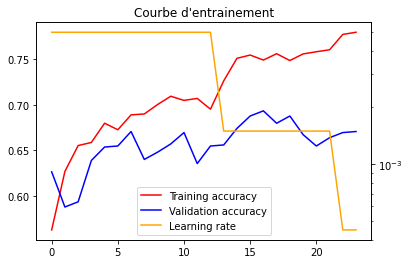

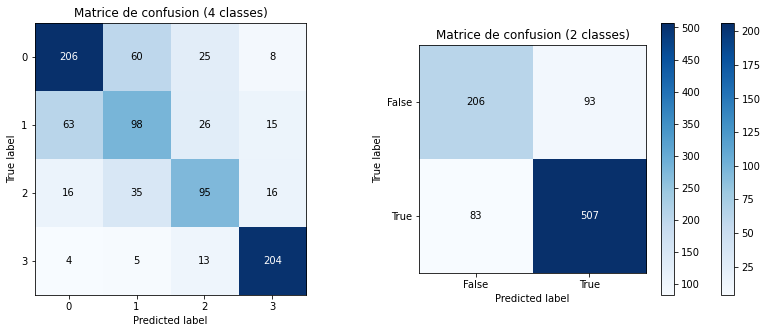

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       299
           1       0.49      0.49      0.49       202
           2       0.60      0.59      0.59       162
           3       0.84      0.90      0.87       226

    accuracy                           0.68       889
   macro avg       0.66      0.67      0.66       889
weighted avg       0.67      0.68      0.68       889



EfficientNetB7v1-transfert-small-4-A0


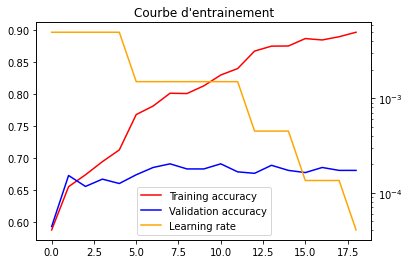

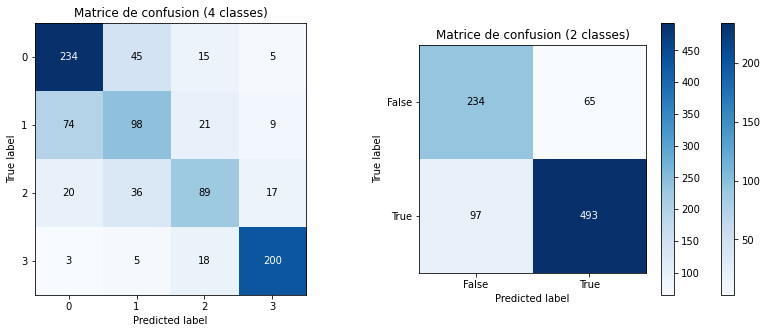

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       299
           1       0.53      0.49      0.51       202
           2       0.62      0.55      0.58       162
           3       0.87      0.88      0.88       226

    accuracy                           0.70       889
   macro avg       0.68      0.68      0.68       889
weighted avg       0.69      0.70      0.69       889



EfficientNetB7v1-transfert-small-4-A2


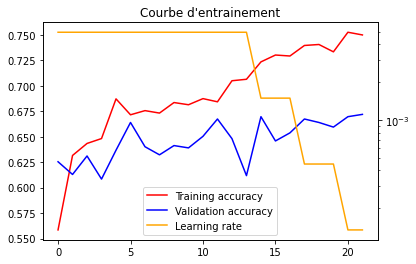

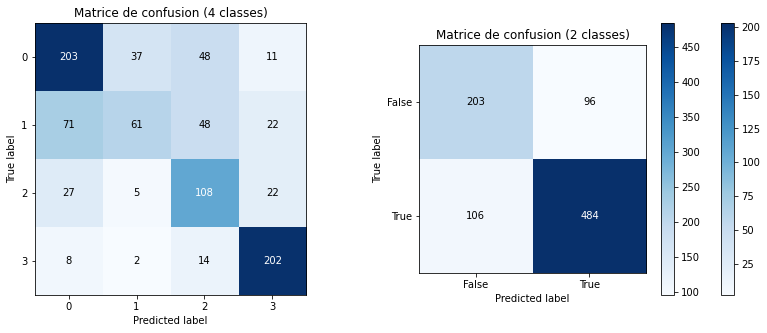

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       299
           1       0.58      0.30      0.40       202
           2       0.50      0.67      0.57       162
           3       0.79      0.89      0.84       226

    accuracy                           0.65       889
   macro avg       0.63      0.64      0.62       889
weighted avg       0.64      0.65      0.63       889



EfficientNetB7v1-transfert-small-4-A1


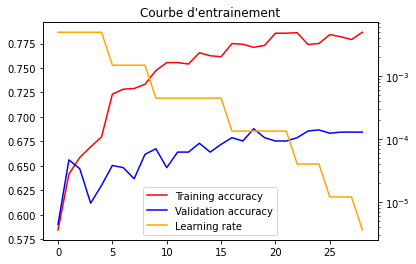

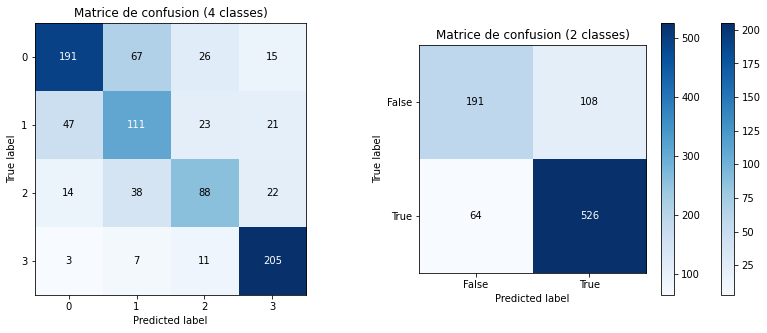

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       299
           1       0.50      0.55      0.52       202
           2       0.59      0.54      0.57       162
           3       0.78      0.91      0.84       226

    accuracy                           0.67       889
   macro avg       0.66      0.66      0.65       889
weighted avg       0.67      0.67      0.67       889



ResNet50V2-transfert-small-4-A2


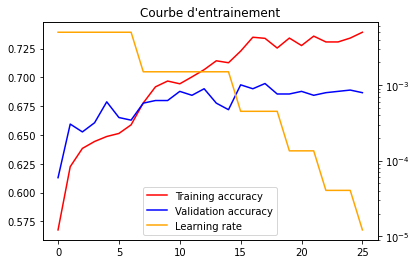

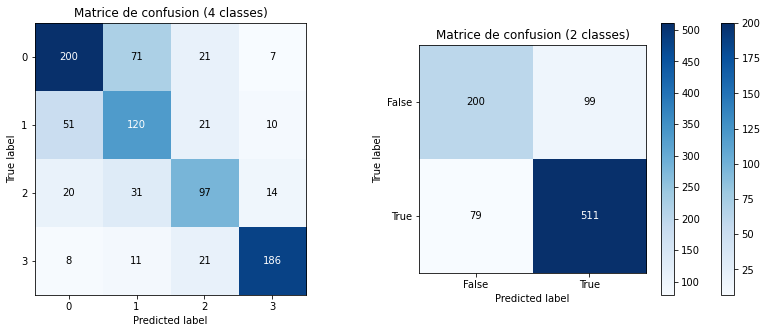

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       299
           1       0.52      0.59      0.55       202
           2       0.61      0.60      0.60       162
           3       0.86      0.82      0.84       226

    accuracy                           0.68       889
   macro avg       0.67      0.67      0.67       889
weighted avg       0.69      0.68      0.68       889



ResNet50V2-retrain-small-4-A2


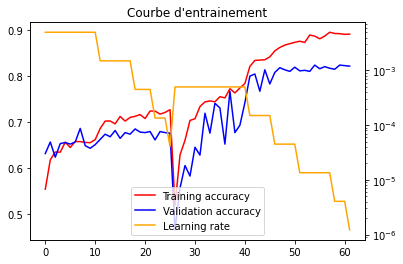

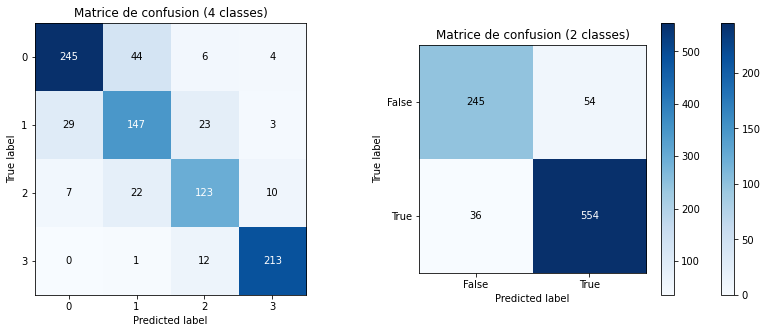

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       299
           1       0.69      0.73      0.71       202
           2       0.75      0.76      0.75       162
           3       0.93      0.94      0.93       226

    accuracy                           0.82       889
   macro avg       0.81      0.81      0.81       889
weighted avg       0.82      0.82      0.82       889



ResNet50V2-retrain-full-4-A2


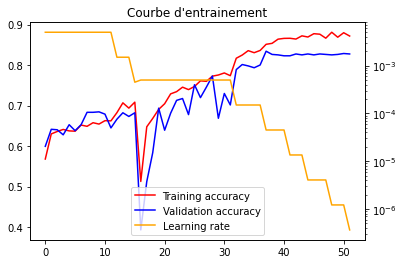

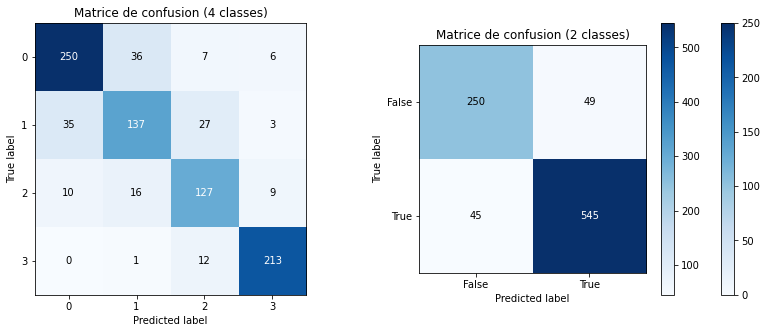

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       299
           1       0.72      0.68      0.70       202
           2       0.73      0.78      0.76       162
           3       0.92      0.94      0.93       226

    accuracy                           0.82       889
   macro avg       0.81      0.81      0.81       889
weighted avg       0.82      0.82      0.82       889



ResNet50V2-retrain-small-4-A0


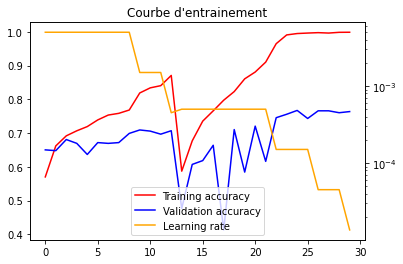

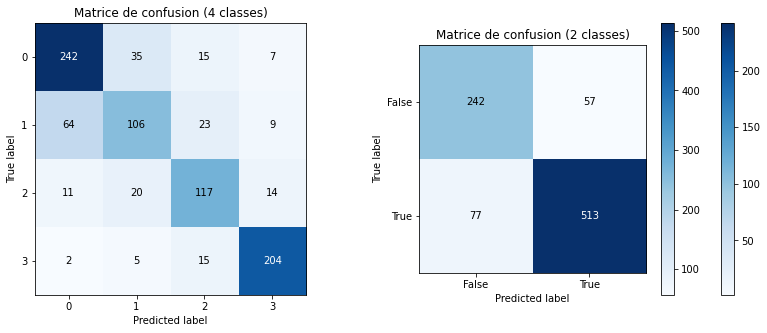

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       299
           1       0.64      0.52      0.58       202
           2       0.69      0.72      0.70       162
           3       0.87      0.90      0.89       226

    accuracy                           0.75       889
   macro avg       0.74      0.74      0.74       889
weighted avg       0.75      0.75      0.75       889



ResNet50V2-retrain-small-4-A1


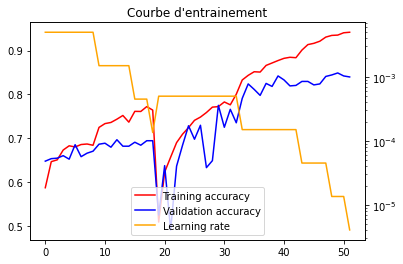

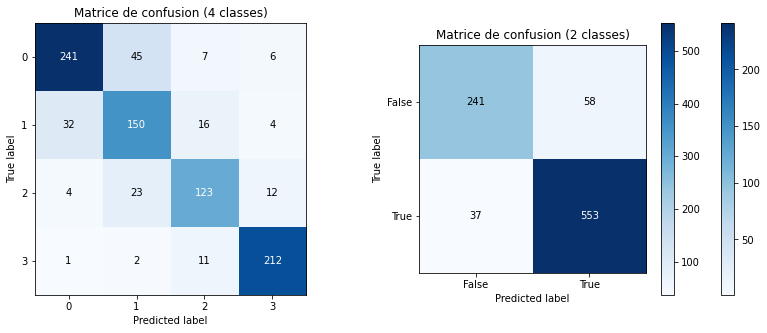

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       299
           1       0.68      0.74      0.71       202
           2       0.78      0.76      0.77       162
           3       0.91      0.94      0.92       226

    accuracy                           0.82       889
   macro avg       0.81      0.81      0.81       889
weighted avg       0.82      0.82      0.82       889



ResNet50V2-retrain-small-4-A3


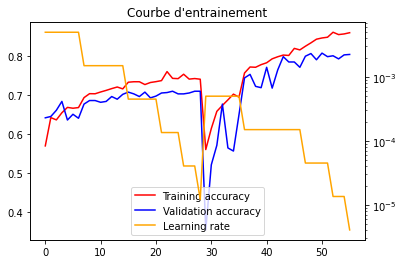

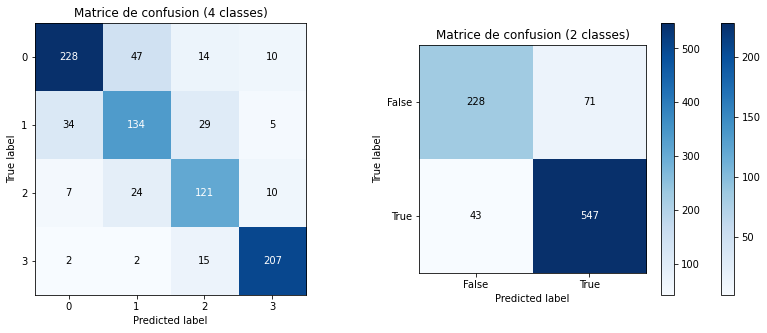

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       299
           1       0.65      0.66      0.66       202
           2       0.68      0.75      0.71       162
           3       0.89      0.92      0.90       226

    accuracy                           0.78       889
   macro avg       0.76      0.77      0.77       889
weighted avg       0.78      0.78      0.78       889



ResNet50V2-retrain-full-4-A3


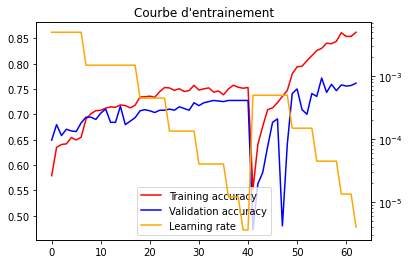

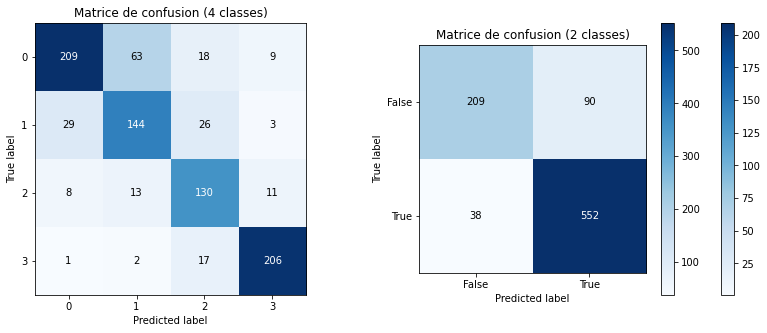

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       299
           1       0.65      0.71      0.68       202
           2       0.68      0.80      0.74       162
           3       0.90      0.91      0.91       226

    accuracy                           0.78       889
   macro avg       0.77      0.78      0.77       889
weighted avg       0.78      0.78      0.78       889



CustomCNNv1-transfert-small-4-A2


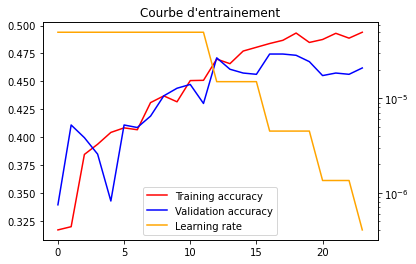

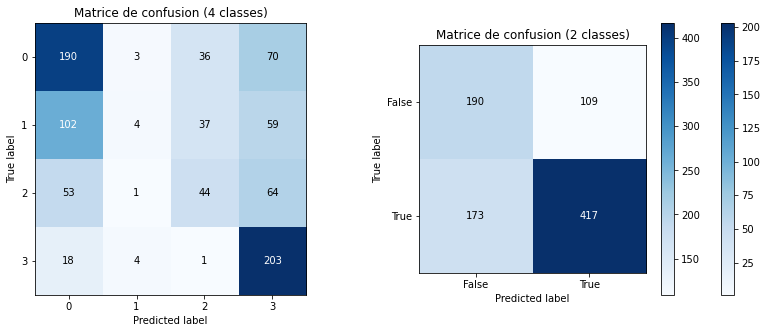

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       299
           1       0.33      0.02      0.04       202
           2       0.37      0.27      0.31       162
           3       0.51      0.90      0.65       226

    accuracy                           0.50       889
   macro avg       0.44      0.46      0.39       889
weighted avg       0.45      0.50      0.42       889



VGG16imagenet-transfert-small-4-A2


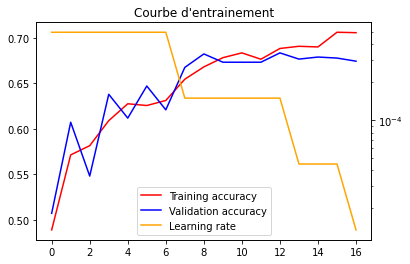

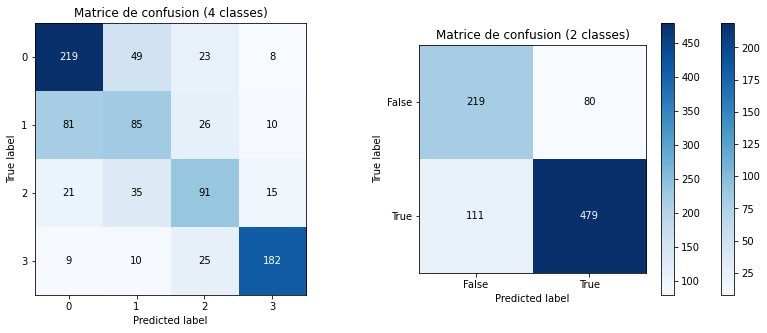

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       299
           1       0.47      0.42      0.45       202
           2       0.55      0.56      0.56       162
           3       0.85      0.81      0.83       226

    accuracy                           0.65       889
   macro avg       0.63      0.63      0.63       889
weighted avg       0.65      0.65      0.65       889



VGG16imagenet-retrain-small-4-A0


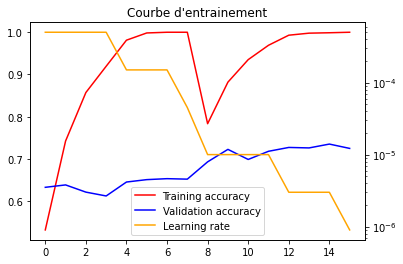

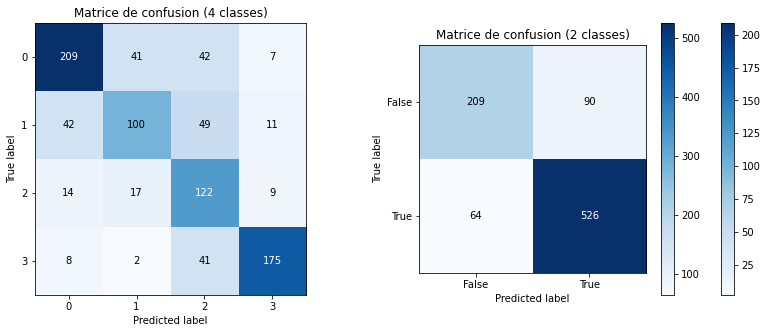

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       299
           1       0.62      0.50      0.55       202
           2       0.48      0.75      0.59       162
           3       0.87      0.77      0.82       226

    accuracy                           0.68       889
   macro avg       0.68      0.68      0.67       889
weighted avg       0.71      0.68      0.69       889



VGG16imagenet-retrain-small-4-A1


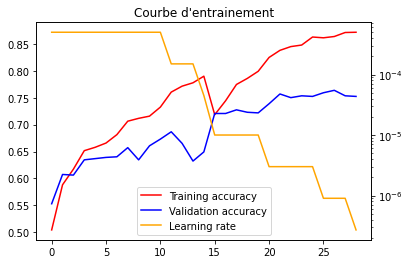

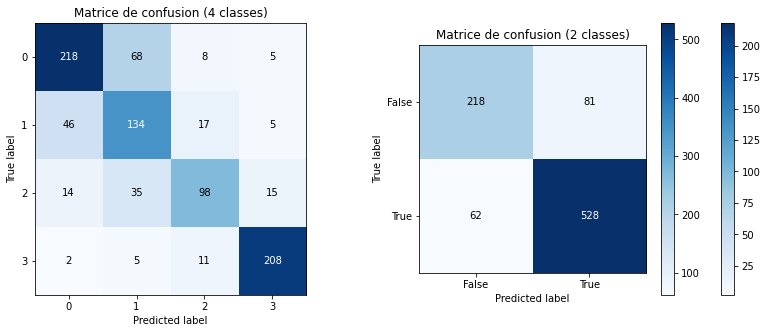

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       299
           1       0.55      0.66      0.60       202
           2       0.73      0.60      0.66       162
           3       0.89      0.92      0.91       226

    accuracy                           0.74       889
   macro avg       0.74      0.73      0.73       889
weighted avg       0.75      0.74      0.74       889



VGG16imagenet-retrain-small-4-A2


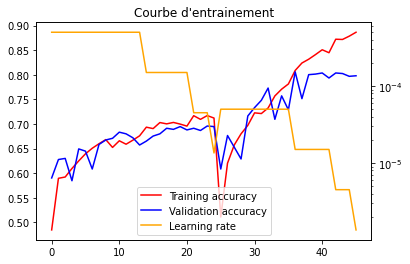

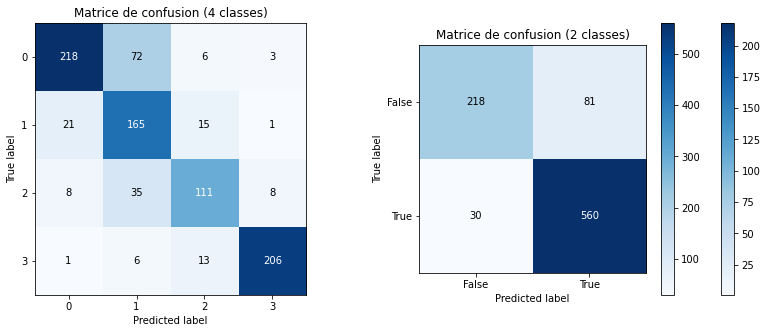

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       299
           1       0.59      0.82      0.69       202
           2       0.77      0.69      0.72       162
           3       0.94      0.91      0.93       226

    accuracy                           0.79       889
   macro avg       0.80      0.79      0.78       889
weighted avg       0.81      0.79      0.79       889



VGG16imagenet-retrain-small-4-A3


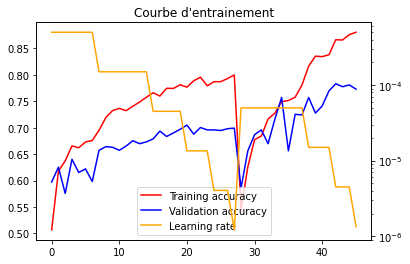

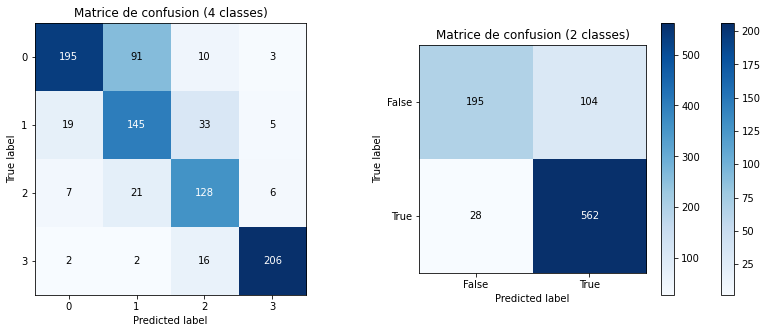

              precision    recall  f1-score   support

           0       0.87      0.65      0.75       299
           1       0.56      0.72      0.63       202
           2       0.68      0.79      0.73       162
           3       0.94      0.91      0.92       226

    accuracy                           0.76       889
   macro avg       0.76      0.77      0.76       889
weighted avg       0.78      0.76      0.76       889



VGG16FromScratch-transfert-small-4-A2


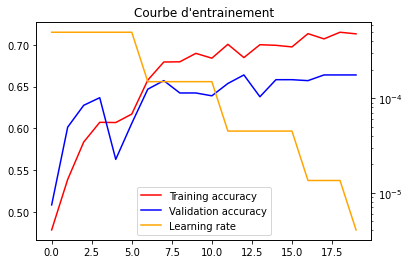

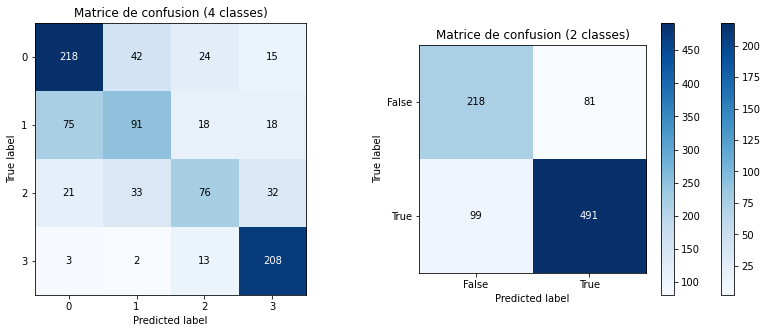

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       299
           1       0.54      0.45      0.49       202
           2       0.58      0.47      0.52       162
           3       0.76      0.92      0.83       226

    accuracy                           0.67       889
   macro avg       0.64      0.64      0.64       889
weighted avg       0.65      0.67      0.66       889



VGG19imagenet-retrain-small-4-A2


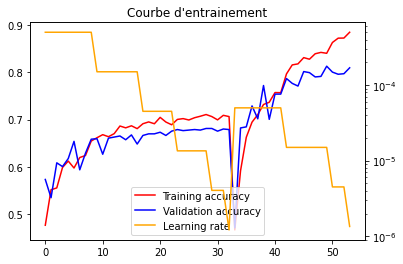

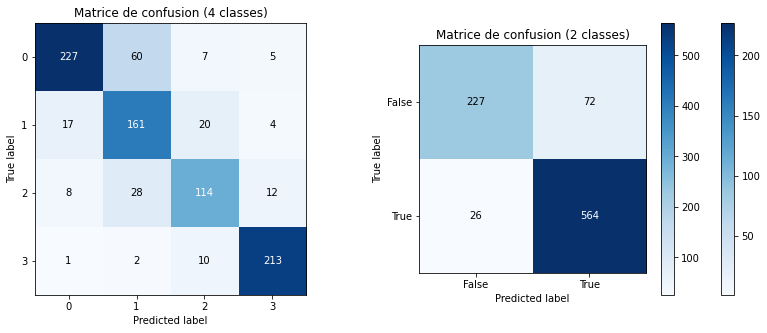

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       299
           1       0.64      0.80      0.71       202
           2       0.75      0.70      0.73       162
           3       0.91      0.94      0.93       226

    accuracy                           0.80       889
   macro avg       0.80      0.80      0.80       889
weighted avg       0.82      0.80      0.81       889



ResNet50V2-retrain-full-4-A1


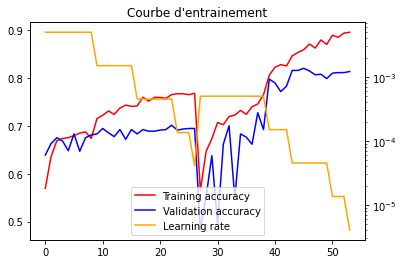

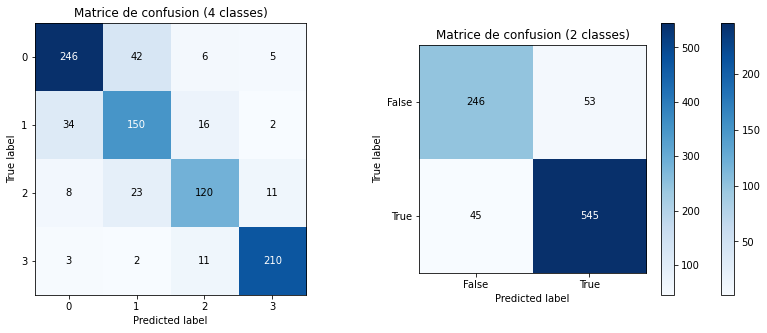

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       299
           1       0.69      0.74      0.72       202
           2       0.78      0.74      0.76       162
           3       0.92      0.93      0.93       226

    accuracy                           0.82       889
   macro avg       0.81      0.81      0.81       889
weighted avg       0.82      0.82      0.82       889



VGG19-transfert-small-4-A2


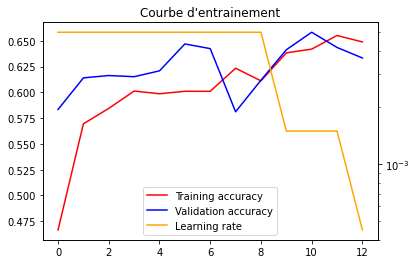

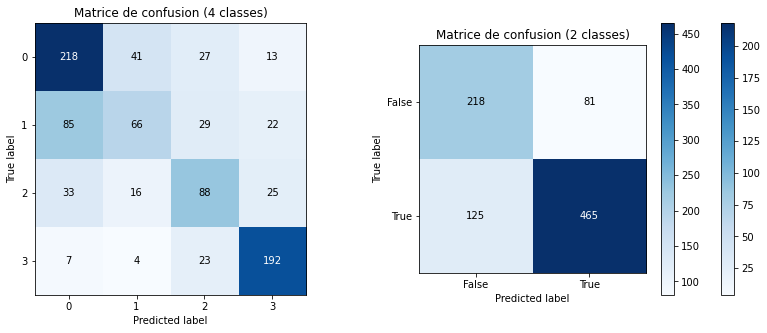

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       299
           1       0.52      0.33      0.40       202
           2       0.53      0.54      0.53       162
           3       0.76      0.85      0.80       226

    accuracy                           0.63       889
   macro avg       0.61      0.61      0.60       889
weighted avg       0.62      0.63      0.62       889



VGG19-transfert-small-4-A3


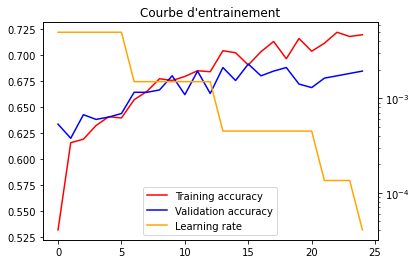

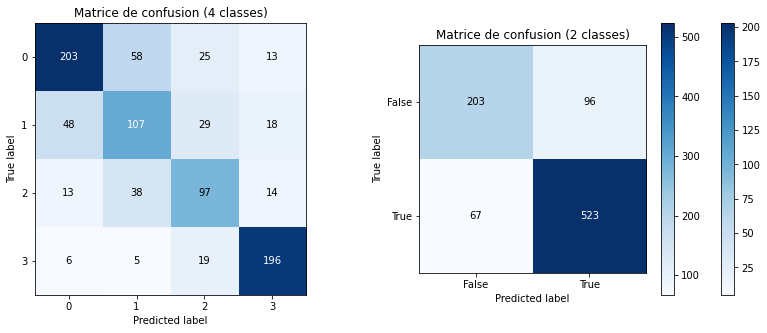

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       299
           1       0.51      0.53      0.52       202
           2       0.57      0.60      0.58       162
           3       0.81      0.87      0.84       226

    accuracy                           0.68       889
   macro avg       0.66      0.67      0.66       889
weighted avg       0.68      0.68      0.68       889



VGG19-transfert-small-4-A0


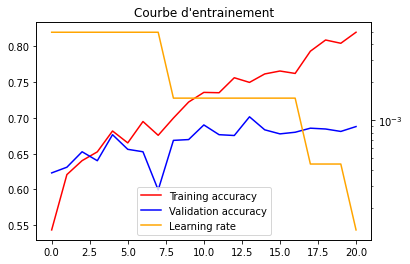

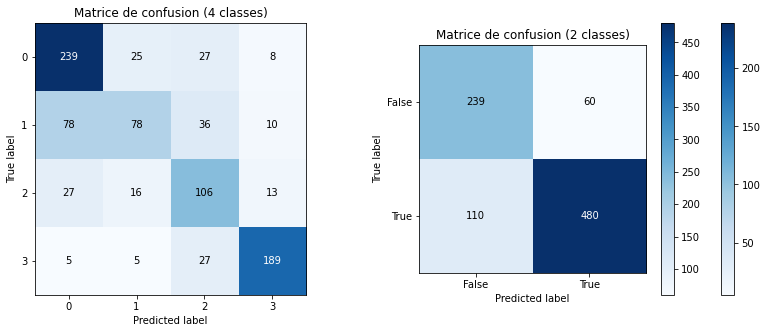

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       299
           1       0.63      0.39      0.48       202
           2       0.54      0.65      0.59       162
           3       0.86      0.84      0.85       226

    accuracy                           0.69       889
   macro avg       0.68      0.67      0.66       889
weighted avg       0.69      0.69      0.68       889



VGG16-transfert-small-4-A3


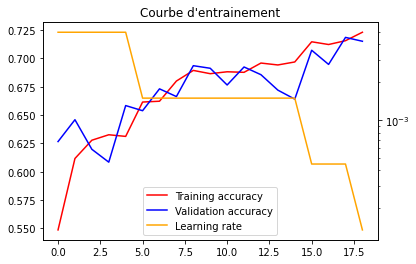

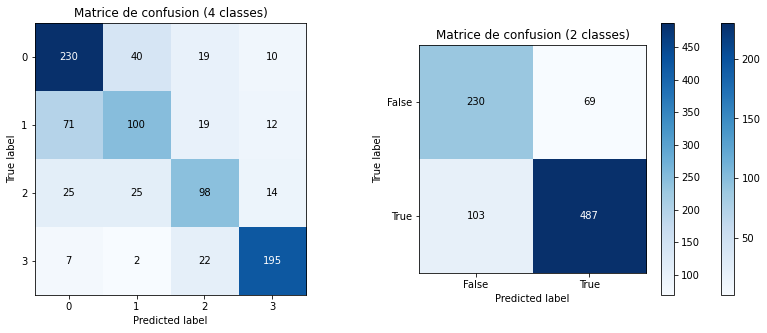

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       299
           1       0.60      0.50      0.54       202
           2       0.62      0.60      0.61       162
           3       0.84      0.86      0.85       226

    accuracy                           0.70       889
   macro avg       0.69      0.68      0.68       889
weighted avg       0.70      0.70      0.70       889



VGG19-transfert-small-4-A1


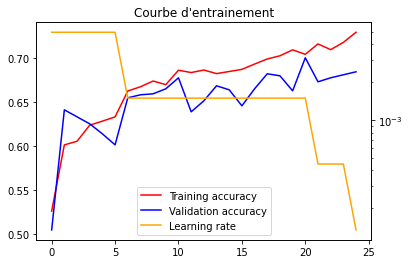

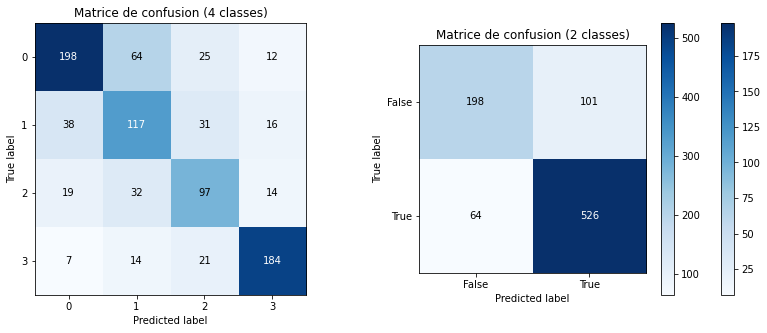

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       299
           1       0.52      0.58      0.55       202
           2       0.56      0.60      0.58       162
           3       0.81      0.81      0.81       226

    accuracy                           0.67       889
   macro avg       0.66      0.66      0.66       889
weighted avg       0.68      0.67      0.67       889



VGG16-transfert-small-4-A2


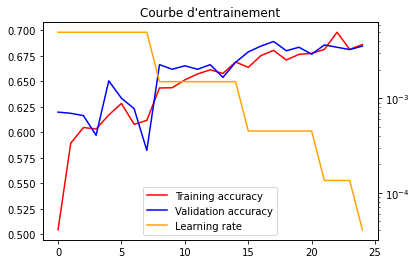

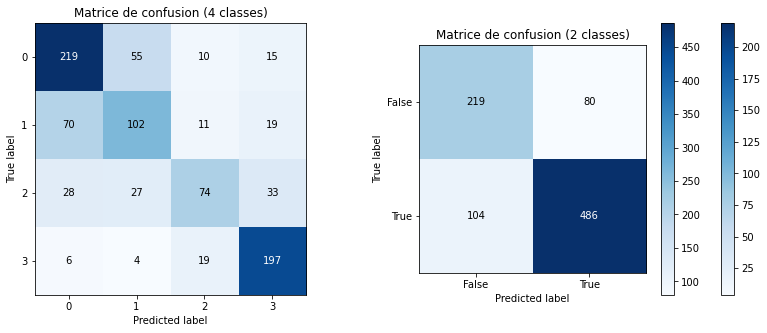

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       299
           1       0.54      0.50      0.52       202
           2       0.65      0.46      0.54       162
           3       0.75      0.87      0.80       226

    accuracy                           0.67       889
   macro avg       0.65      0.64      0.64       889
weighted avg       0.66      0.67      0.66       889



VGG16-transfert-small-4-A0


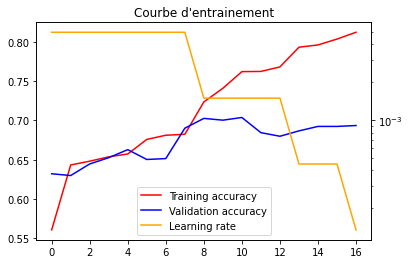

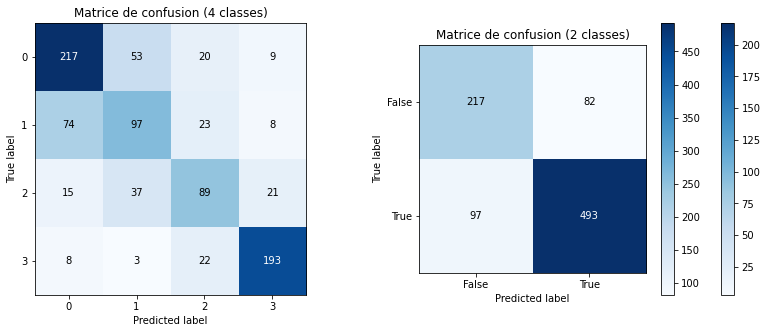

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       299
           1       0.51      0.48      0.49       202
           2       0.58      0.55      0.56       162
           3       0.84      0.85      0.84       226

    accuracy                           0.67       889
   macro avg       0.65      0.65      0.65       889
weighted avg       0.67      0.67      0.67       889



VGG16-transfert-small-4-A1


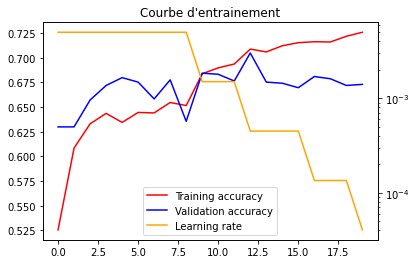

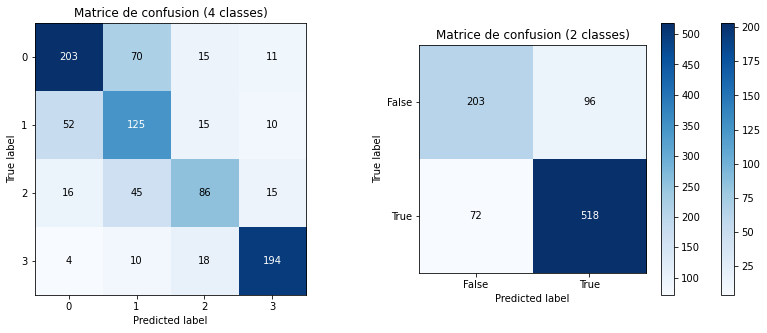

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       299
           1       0.50      0.62      0.55       202
           2       0.64      0.53      0.58       162
           3       0.84      0.86      0.85       226

    accuracy                           0.68       889
   macro avg       0.68      0.67      0.67       889
weighted avg       0.69      0.68      0.69       889



ResNet50V2Reg-retrain-small-regression-A2


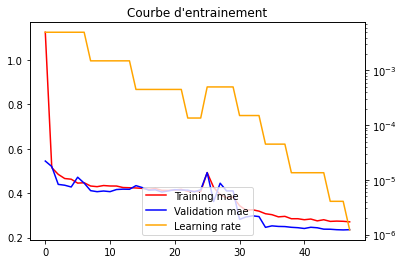

ResNet50V2-retrain-small-2-A2


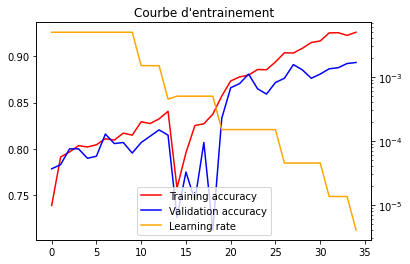

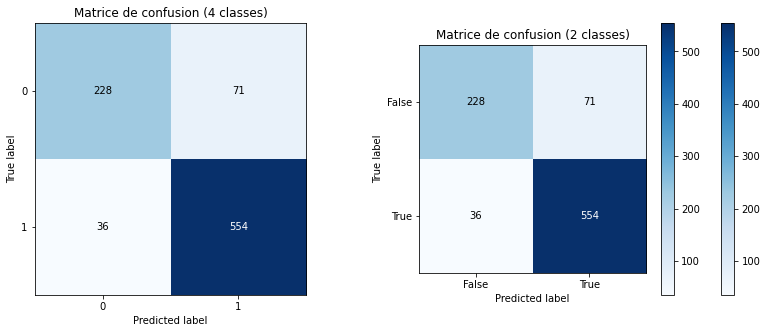

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       299
           1       0.89      0.94      0.91       590

    accuracy                           0.88       889
   macro avg       0.88      0.85      0.86       889
weighted avg       0.88      0.88      0.88       889



ResNet50V2-retrain-small-regression-A2


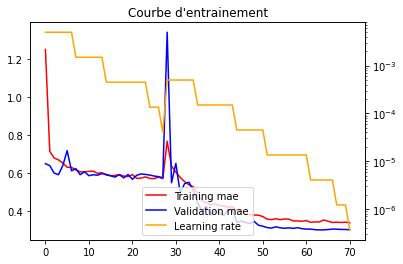

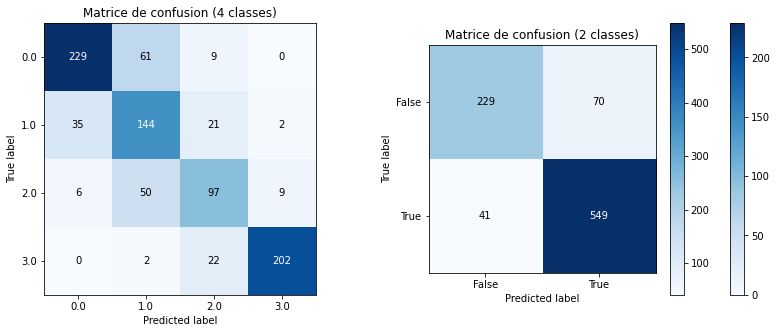

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.80       299
         1.0       0.56      0.71      0.63       202
         2.0       0.65      0.60      0.62       162
         3.0       0.95      0.89      0.92       226

    accuracy                           0.76       889
   macro avg       0.75      0.74      0.74       889
weighted avg       0.77      0.76      0.76       889



EfficientNetB7v1-retrain-small-4-A2


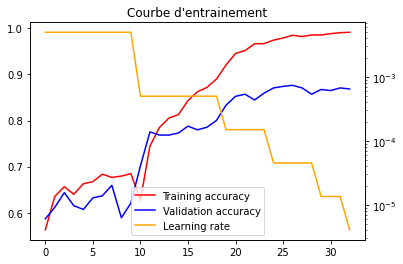

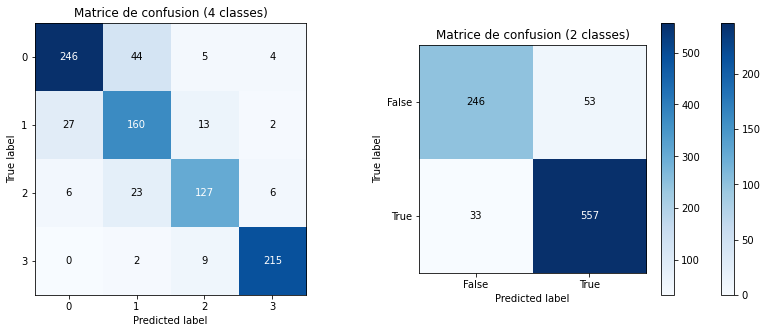

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       299
           1       0.70      0.79      0.74       202
           2       0.82      0.78      0.80       162
           3       0.95      0.95      0.95       226

    accuracy                           0.84       889
   macro avg       0.84      0.84      0.84       889
weighted avg       0.85      0.84      0.84       889



EfficientNetB7v2-retrain-small-4-A2


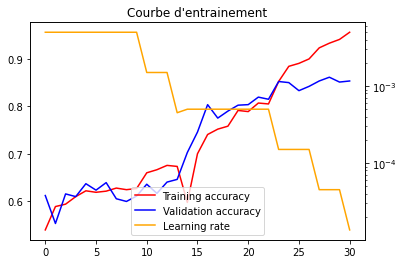

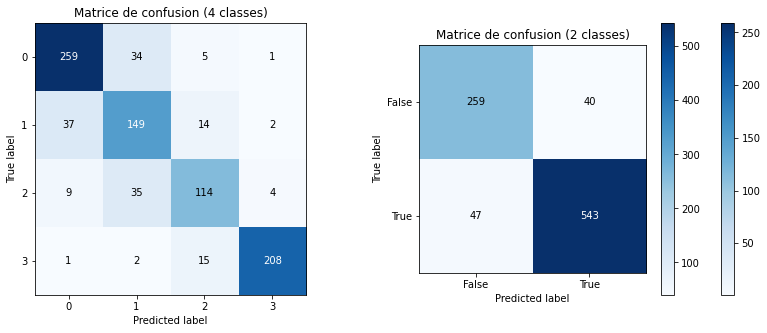

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       299
           1       0.68      0.74      0.71       202
           2       0.77      0.70      0.74       162
           3       0.97      0.92      0.94       226

    accuracy                           0.82       889
   macro avg       0.82      0.81      0.81       889
weighted avg       0.82      0.82      0.82       889



EfficientNetB7v2-retrain-small-4-A1


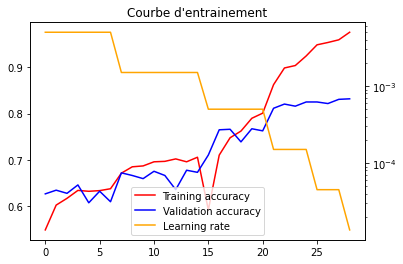

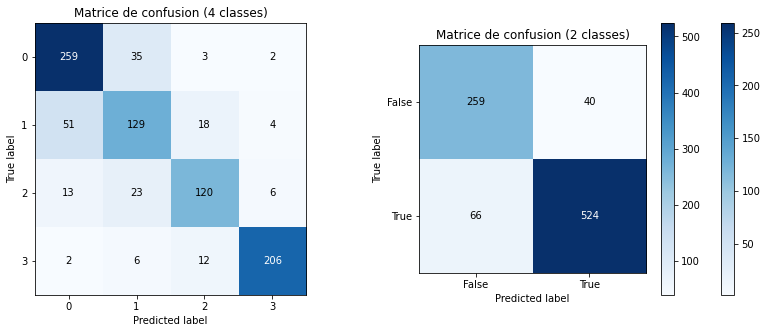

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       299
           1       0.67      0.64      0.65       202
           2       0.78      0.74      0.76       162
           3       0.94      0.91      0.93       226

    accuracy                           0.80       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.80      0.80      0.80       889



EfficientNetB7v2-retrain-small-4-A3


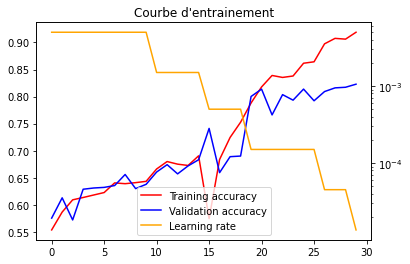

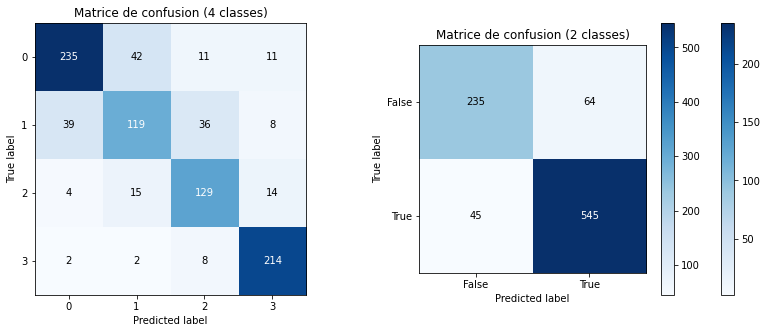

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       299
           1       0.67      0.59      0.63       202
           2       0.70      0.80      0.75       162
           3       0.87      0.95      0.90       226

    accuracy                           0.78       889
   macro avg       0.77      0.78      0.77       889
weighted avg       0.78      0.78      0.78       889



EfficientNetB7v1-retrain-small-4-A1


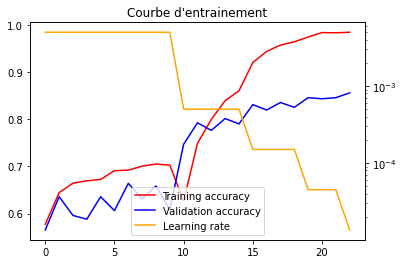

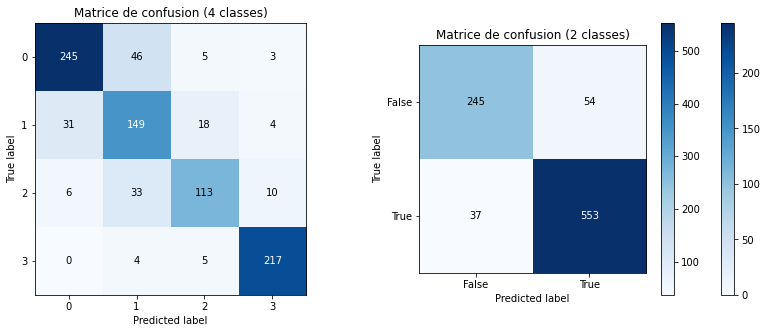

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       299
           1       0.64      0.74      0.69       202
           2       0.80      0.70      0.75       162
           3       0.93      0.96      0.94       226

    accuracy                           0.81       889
   macro avg       0.81      0.80      0.80       889
weighted avg       0.82      0.81      0.82       889



EfficientNetB7v1-retrain-small-4-A3


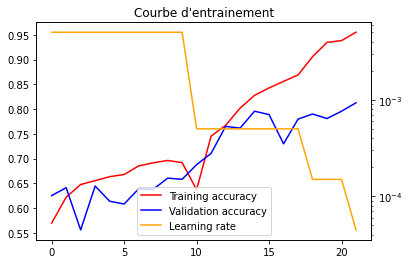

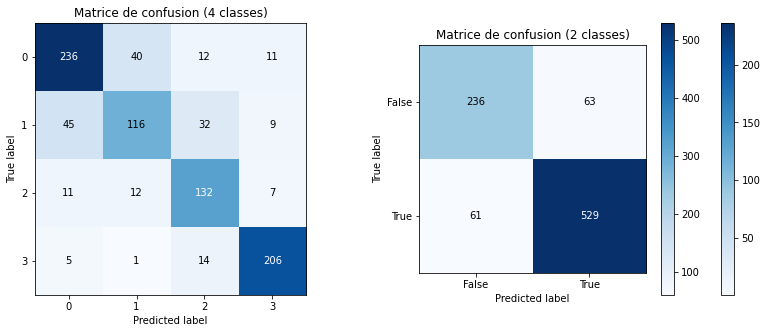

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       299
           1       0.69      0.57      0.63       202
           2       0.69      0.81      0.75       162
           3       0.88      0.91      0.90       226

    accuracy                           0.78       889
   macro avg       0.76      0.77      0.77       889
weighted avg       0.77      0.78      0.77       889





In [38]:
for d in os.listdir(FOLDER_MODELS):
  if os.path.isdir(join(FOLDER_MODELS,d)):
    try:
      # print(os.listdir(join(FOLDER_MODELS,d)))
      uri_history = glob.glob(join(FOLDER_MODELS,d,"*-history.csv"))[0]
      history = pd.read_csv(uri_history)
      print(d)
      plot_history(history)

      uri_predictions = glob.glob(join(FOLDER_MODELS,d,"*-predictions.csv"))[0]
      predictions = pd.read_csv(uri_predictions)
      print_metrics(predictions)
      print("")
      print("")

    except:
      pass
                
    # break